<a href="https://colab.research.google.com/github/DanielleFuenzalida/Entrega-final-2025/blob/main/Acc_Br_2017_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstracto

Los accidentes de tránsito son una de las principales causas de muerte y lesiones graves en Brasil. A través del análisis de datos históricos de accidentes ocurridos entre 2017 y 2023, este proyecto busca identificar los tipos de accidentes más peligrosos, en términos de muertes y heridos graves.

El objetivo es aportar información clave para mejorar la seguridad vial y ayudar a instituciones como la Policía Rodoviária Federal, municipios, y ONGs dedicadas a la prevención de siniestros.

Audiencia objetivo: responsables de políticas públicas, planificadores urbanos, investigadores en movilidad, y organizaciones de prevención de accidentes.


# Preguntas de investigación

1. ¿Qué tipo de accidente causa más muertes?
2. ¿Qué tipo de accidente causa más heridos graves?
3. ¿Qué días de la semana presentan más accidentes fatales?
4. ¿Influyen las condiciones climáticas en la gravedad de los accidentes?
5. ¿Existen diferencias entre los estados brasileños en cuanto a tipos de accidentes y víctimas?

# Hipótesis

La mayoría de muertes ocurren en choques frontales y atropellos.


Fines de semana son críticos.

El clima y la ubicación geográfica podrían ser factores clave.

Recomendaciones: campañas en fines de semana, control en días de lluvia, políticas por estado.



Carga y limpieza de datos

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd


df = pd.read_csv('/content/drive/MyDrive/accidents 2017-2023.csv')
df.head()


,inverse_data,week_day,hour,state,road_id,km,city,cause_of_accident,type_of_accident,victims_condition,...,slightly_injured,severely_injured,uninjured,ignored,total_injured,vehicles_involved,latitude,longitude,regional,police_station
0,2017-01-01,sunday,01:45:00,RS,116.0,"34,9",VACARIA,Mechanical loss/defect of vehicle,Rear-end collision,With injured victims,...,4,0,2,0,4,2,-28.50712,-50.94118,SPRF-RS,DEL05-RS
1,2017-01-01,sunday,01:00:00,PR,376.0,636,TIJUCAS DO SUL,Incompatible velocity,Run-off-road,With dead victims,...,0,0,1,0,0,2,-25.75400,-49.12660,SPRF-PR,DEL01-PR
2,2017-01-01,sunday,04:40:00,BA,101.0,65,ENTRE RIOS,Driver was sleeping,Head-on collision,With dead victims,...,1,1,2,0,2,2,-11.96180,-38.09530,SPRF-BA,DEL01-BA
3,2017-01-01,sunday,06:30:00,PA,316.0,"72,5",CASTANHAL,Driver's lack of attention to conveyance,Side impact collision,With dead victims,...,0,0,3,0,0,3,-1.28998,-47.83483,SPRF-PA,DEL01-PA
4,2017-01-01,sunday,09:00:00,GO,20.0,"220,5",POSSE,Road's defect,Collision with fixed object,With injured victims,...,2,1,0,0,3,1,-14.14221,-46.32259,SPRF-DF,DEL02-DF


In [9]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463152 entries, 0 to 463151
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   inverse_data        463152 non-null  object 
 1   week_day            463152 non-null  object 
 2   hour                463152 non-null  object 
 3   state               463152 non-null  object 
 4   road_id             462162 non-null  float64
 5   km                  462162 non-null  object 
 6   city                463152 non-null  object 
 7   cause_of_accident   463152 non-null  object 
 8   type_of_accident    463152 non-null  object 
 9   victims_condition   463152 non-null  object 
 10  weather_timestamp   463152 non-null  object 
 11  road_direction      463152 non-null  object 
 12  wheather_condition  463152 non-null  object 
 13  road_type           463152 non-null  object 
 14  road_delineation    463152 non-null  object 
 15  people              463152 non-nul

In [13]:
df.isnull().sum()

,0
inverse_data,0
week_day,0
hour,0
state,0
road_id,990
km,990
city,0
cause_of_accident,0
type_of_accident,0
victims_condition,0


In [18]:
print(df["deaths"].value_counts())


deaths
0     431808
1      27667
2       2703
3        599
4        222
5         88
6         30
7         16
8          7
12         3
9          2
11         2
13         2
21         1
10         1
19         1
Name: count, dtype: int64


In [8]:
df.describe(include='all')


,inverse_data,week_day,hour,state,road_id,km,city,cause_of_accident,type_of_accident,victims_condition,...,slightly_injured,severely_injured,uninjured,ignored,total_injured,vehicles_involved,latitude,longitude,regional,police_station
count,463152,463152,463152,463152,462162.000000,462162,463152,463152,463152,463152,...,463152.000000,463152.000000,463152.000000,463152.000000,463152.000000,463152.000000,4.631520e+05,4.631520e+05,463142,461842
unique,2434,7,1440,27,NaN,9769,2083,85,21,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,151
top,2017-12-23,saturday,19:00:00,MG,NaN,1,BRASILIA,Driver's lack of attention to conveyance,Rear-end collision,With injured victims,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SPRF-MG,DEL01-PR
freq,449,77133,6686,61321,NaN,1905,6642,107788,86472,332213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61177,21099
mean,NaN,NaN,NaN,NaN,213.432900,NaN,NaN,NaN,NaN,NaN,...,0.835469,0.259530,1.044070,0.144069,1.094999,1.645725,-2.343287e+03,-8.924977e+03,NaN,NaN
std,NaN,NaN,NaN,NaN,130.757607,NaN,NaN,NaN,NaN,NaN,...,1.075275,0.602814,1.502419,0.438168,1.205351,0.731394,1.519113e+06,5.903043e+06,NaN,NaN
min,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.033383e+09,-4.016764e+09,NaN,NaN
25%,NaN,NaN,NaN,NaN,101.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.533123e+01,-5.030294e+01,NaN,NaN
50%,NaN,NaN,NaN,NaN,163.000000,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-2.042034e+01,-4.780831e+01,NaN,NaN
75%,NaN,NaN,NaN,NaN,324.000000,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-1.282657e+01,-4.264249e+01,NaN,NaN


**¿Qué tipo de accidente causa más muertes?**

<ipython-input-10-e8eca30641a4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deaths_by_type.values, y=deaths_by_type.index, palette="Reds_r")


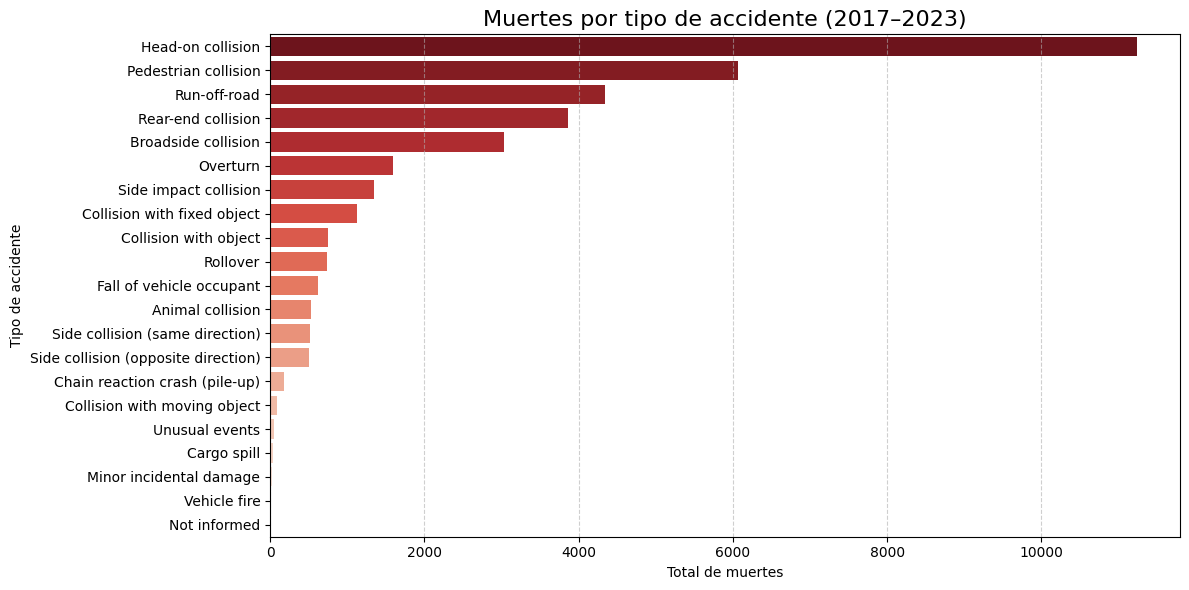

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


deaths_by_type = df.groupby("type_of_accident")["deaths"].sum().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x=deaths_by_type.values, y=deaths_by_type.index, palette="Reds_r")
plt.title("Muertes por tipo de accidente (2017–2023)", fontsize=16)
plt.xlabel("Total de muertes")
plt.ylabel("Tipo de accidente")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


**¿Qué tipo de accidente causa más heridos graves?**


In [17]:
import pandas as pd
import plotly.express as px


df = pd.read_csv("/content/drive/MyDrive/accidents 2017-2023.csv")


severe_injuries_df = (
    df.groupby("type_of_accident")["severely_injured"]
    .sum()
    .reset_index()
    .sort_values(by="severely_injured", ascending=True)
)


fig = px.bar(
    severe_injuries_df,
    x='severely_injured',
    y='type_of_accident',
    orientation='h',
    title='Heridos graves por tipo de accidente (2017–2023)',
    labels={'severely_injured': 'Número de heridos graves', 'type_of_accident': 'Tipo de accidente'},
    color='severely_injured',
    color_continuous_scale='Reds'
)

fig.show()


**¿Qué días de la semana presentan más accidentes fatales?**


<ipython-input-4-4d61131164cc>:16: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


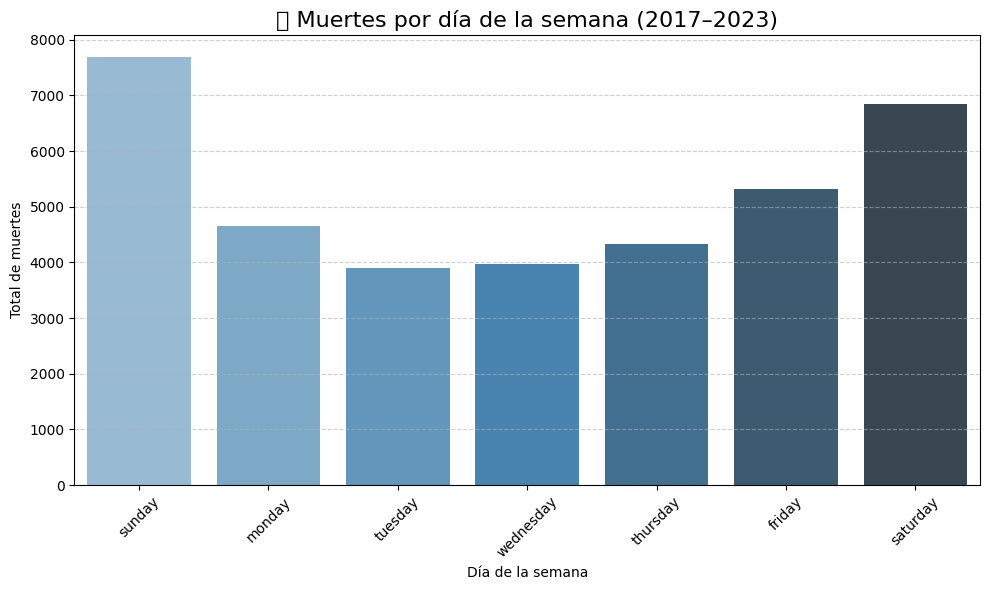

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


ordered_days = ['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday']
deaths_by_day = df.groupby("week_day")["deaths"].sum().reindex(ordered_days)


plt.figure(figsize=(10, 6))
sns.barplot(x=deaths_by_day.index, y=deaths_by_day.values, palette="Blues_d")
plt.title("🔵 Muertes por día de la semana (2017–2023)", fontsize=16)
plt.xlabel("Día de la semana")
plt.ylabel("Total de muertes")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**¿Influyen las condiciones climáticas en la gravedad de los accidentes?**

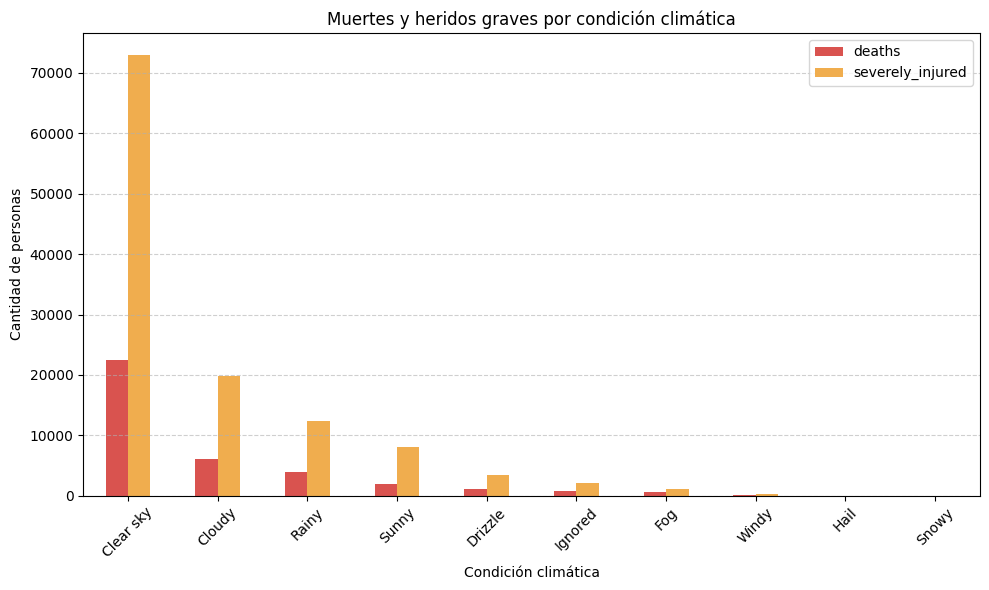

In [5]:

climate_gravity = df.groupby('wheather_condition')[['deaths', 'severely_injured']].sum().sort_values(by='deaths', ascending=False)


import matplotlib.pyplot as plt
climate_gravity.plot(kind='bar', figsize=(10, 6), color=["#d9534f", "#f0ad4e"])
plt.title("Muertes y heridos graves por condición climática")
plt.xlabel("Condición climática")
plt.ylabel("Cantidad de personas")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**¿Existen diferencias entre los estados brasileños en cuanto a tipos de accidentes y víctimas?**


In [46]:
import geopandas as gpd


url = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'


br_states = gpd.read_file(url)


br_states.head()


,id,name,sigla,regiao_id,codigo_ibg,cartodb_id,created_at,updated_at,geometry
0,1,Acre,AC,3,12,1,2015-02-09 16:46:01+00:00,2015-02-09 16:46:01+00:00,"MULTIPOLYGON (((-73.60818 -7.20194, -72.86963 ..."
1,2,Alagoas,AL,4,27,2,2015-02-09 16:46:01+00:00,2015-02-09 16:46:01+00:00,"MULTIPOLYGON (((-35.46516 -8.82549, -35.46626 ..."
2,3,Amazonas,AM,3,13,3,2015-02-09 16:46:01+00:00,2015-02-09 16:46:01+00:00,"MULTIPOLYGON (((-67.32553 2.03012, -67.32234 2..."
3,4,Amapá,AP,3,16,4,2015-02-09 16:46:01+00:00,2015-02-09 16:46:01+00:00,"MULTIPOLYGON (((-51.18168 4.00889, -51.179 3.9..."
4,5,Bahia,BA,4,29,5,2015-02-09 16:46:01+00:00,2015-02-09 16:46:01+00:00,"MULTIPOLYGON (((-39.2882 -8.5629, -39.28229 -8..."


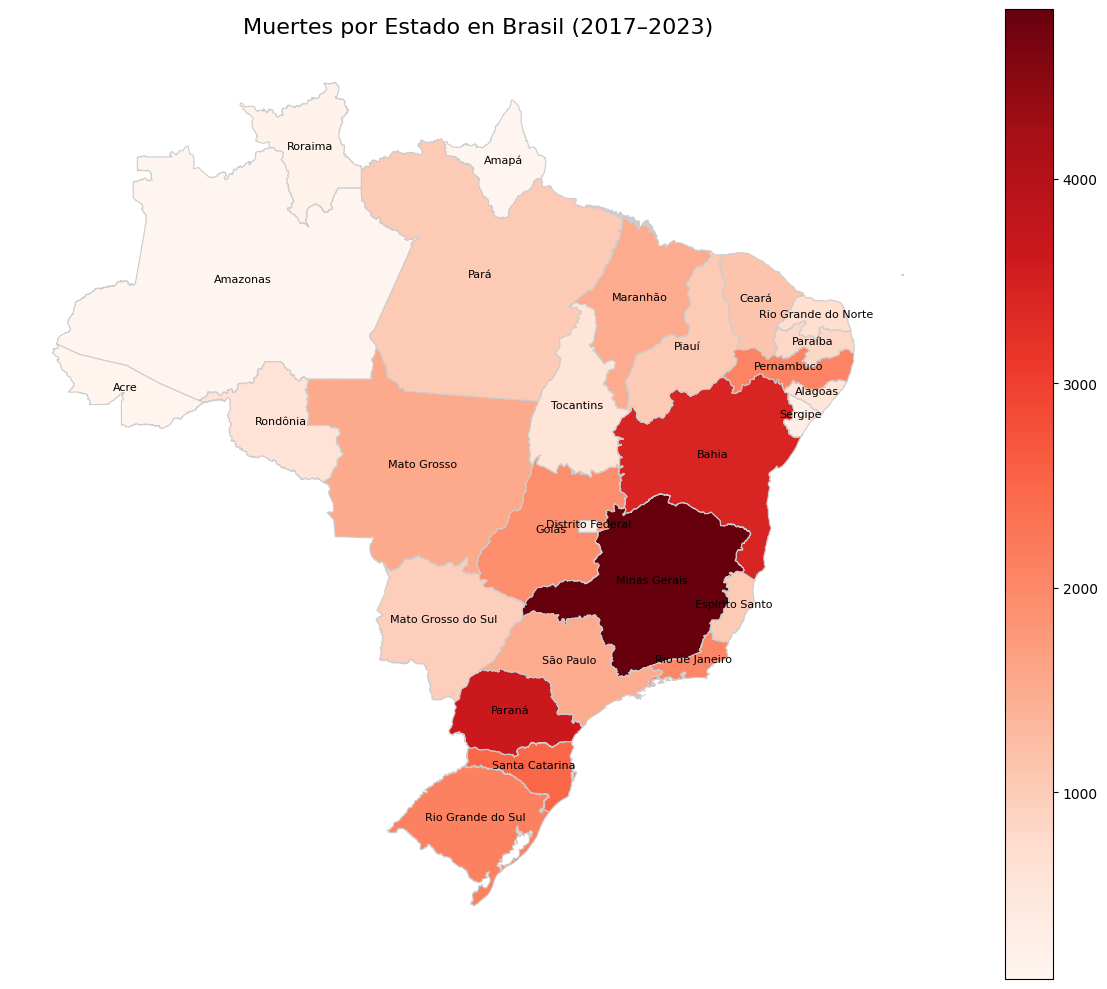

In [51]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


df = pd.read_csv('/content/drive/MyDrive/accidents 2017-2023.csv')


deaths_by_state = df.groupby('state')['deaths'].sum().reset_index()


url = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'
br_states = gpd.read_file(url)

br_states['sigla'] = br_states['sigla'].str.upper()
deaths_by_state['state'] = deaths_by_state['state'].str.upper()


merged = br_states.merge(deaths_by_state, left_on='sigla', right_on='state')


fig, ax = plt.subplots(figsize=(12, 10))
merged.plot(column='deaths', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

for idx, row in merged.iterrows():
    plt.annotate(text=row['name'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 ha='center', fontsize=8, color='black')

ax.set_title("Muertes por Estado en Brasil (2017–2023)", fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()

**Relación entre accidentes, muertes y heridos por estado brasileño**

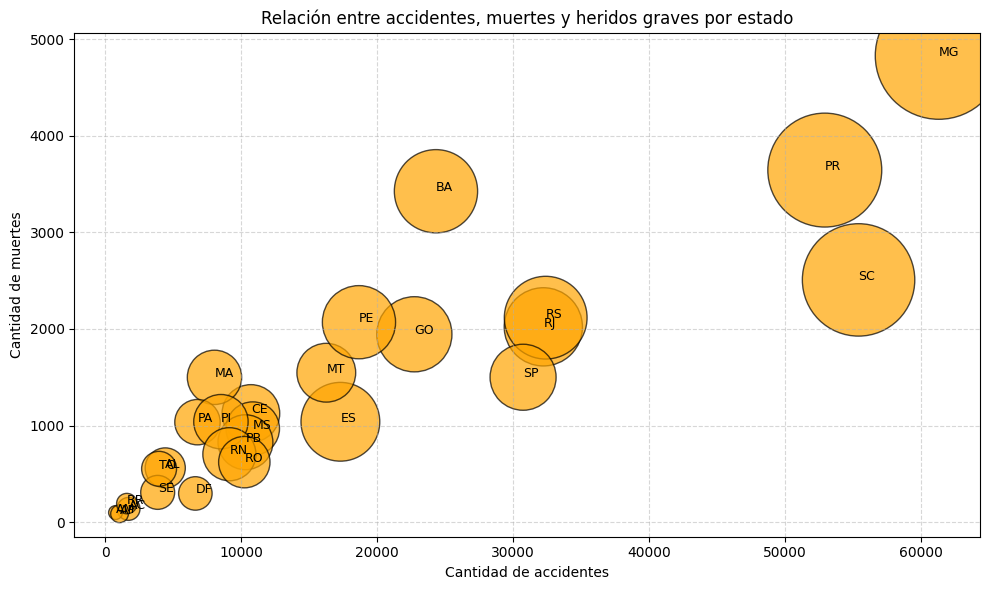

In [7]:
import matplotlib.pyplot as plt

state_summary = df.groupby('state')[['deaths', 'severely_injured']].sum()
state_summary['total_accidents'] = df.groupby('state')['type_of_accident'].count()


plt.figure(figsize=(10, 6))
plt.scatter(state_summary['total_accidents'], state_summary['deaths'],
            s=state_summary['severely_injured']*0.5,
            alpha=0.7, c='orange', edgecolors='black')

for i in state_summary.index:
    plt.text(state_summary.loc[i, 'total_accidents'], state_summary.loc[i, 'deaths'], i, fontsize=9)

plt.title("Relación entre accidentes, muertes y heridos graves por estado")
plt.xlabel("Cantidad de accidentes")
plt.ylabel("Cantidad de muertes")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
